In [3]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [4]:
mnist = fetch_openml('mnist_784')
# mnist = fetch_mldata("MNIST original")


/opt/homebrew/Caskroom/miniconda/base/envs/python-tsne/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


In [21]:
X = mnist.data / 255.0
y = mnist.target

print(X.shape, y.shape)


(70000, 784) (70000,)


We are going to convert the matrix and vector to a pandas DataFrame.


In [22]:
feat_cols = ['pixel'+str(i) for i in range(1, X.shape[1]+1)]

df = pd.DataFrame(X, columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))


Size of the dataframe: (70000, 786)


take a random subset of the digits because we don’t want to be using 70,000 digits in our calculations.

In [23]:
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])


784

<Figure size 640x480 with 0 Axes>

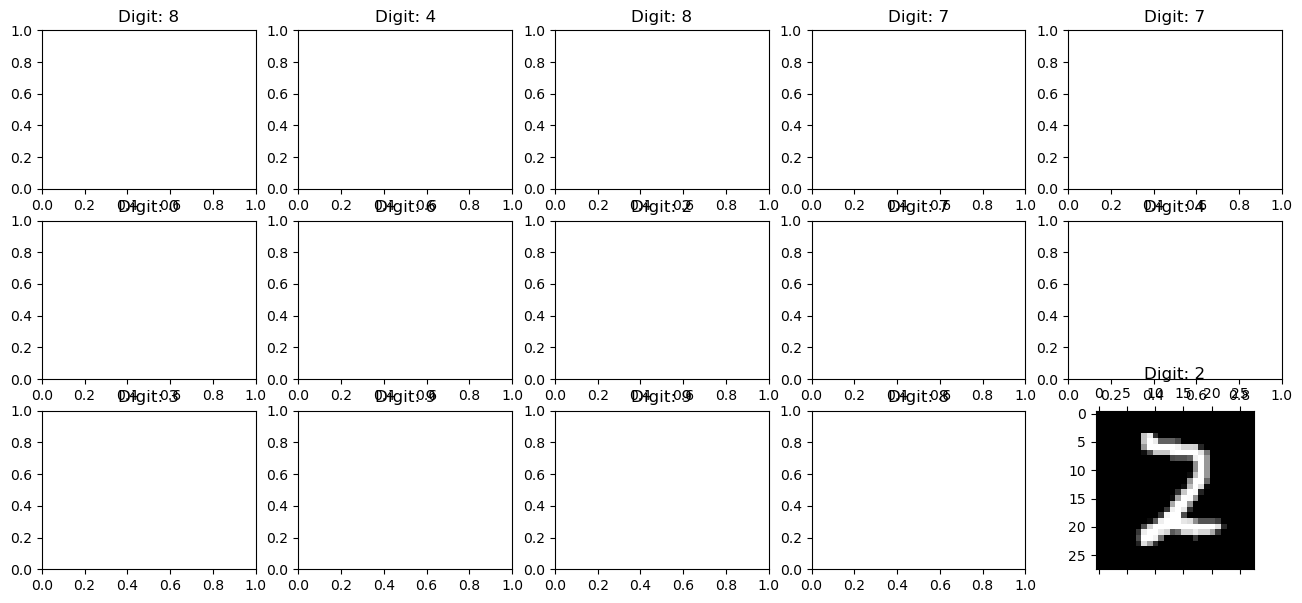

In [24]:
plt.gray()
fig = plt.figure(figsize=(16, 7))
for i in range(0, 15):
    ax = fig.add_subplot(
        3, 5, i+1, title="Digit: {}".format(str(df.loc[rndperm[i], 'label'])))

ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape(
    (28, 28)).astype(float))
plt.show()


In [29]:
df.iloc[0].unique()

array([0.0, 0.011764705882352941, 0.07058823529411765,
       0.49411764705882355, 0.5333333333333333, 0.6862745098039216,
       0.10196078431372549, 0.6509803921568628, 1.0, 0.9686274509803922,
       0.4980392156862745, 0.11764705882352941, 0.1411764705882353,
       0.3686274509803922, 0.6039215686274509, 0.6666666666666666,
       0.9921568627450981, 0.8823529411764706, 0.6745098039215687,
       0.9490196078431372, 0.7647058823529411, 0.25098039215686274,
       0.19215686274509805, 0.9333333333333333, 0.984313725490196,
       0.36470588235294116, 0.3215686274509804, 0.2196078431372549,
       0.15294117647058825, 0.8588235294117647, 0.7764705882352941,
       0.7137254901960784, 0.9450980392156862, 0.3137254901960784,
       0.611764705882353, 0.4196078431372549, 0.803921568627451,
       0.043137254901960784, 0.16862745098039217, 0.054901960784313725,
       0.00392156862745098, 0.35294117647058826, 0.5450980392156862,
       0.7450980392156863, 0.00784313725490196, 0.27450980

In [41]:
np.unique(df[feat_cols].values.flatten())

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

In [42]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]
df['pca-three'] = pca_result[:, 2]

print('Explained variation per principal component: {}'.format(
    pca.explained_variance_ratio_))


Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


Given that the first two components account for about 25 percent of the variation in the entire data set, let’s see if that is enough to visually set the different digits apart. We can create a scatterplot of the first and second principal component and color each of the different types of digits with a different color. If we are lucky, the same type of digits will be positioned, or clustered, together in groups. This would mean that the first two principal components actually tell us a great deal about the specific types of digits.


<Axes: xlabel='pca-one', ylabel='pca-two'>

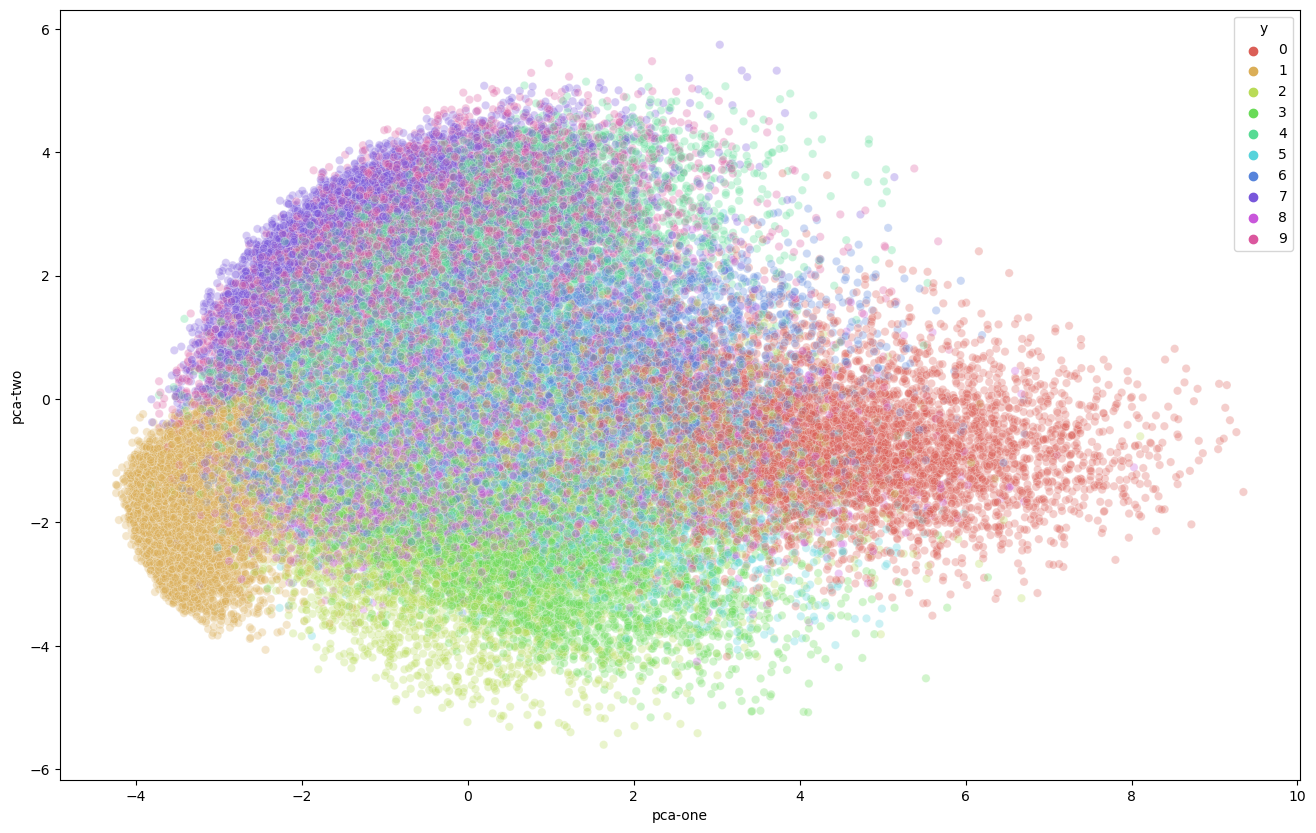

In [43]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm, :],
    legend="full",
    alpha=0.3
)


In [46]:
"./models/GoogleNews-vectors-negative300.bin".endswith(".bin")

True

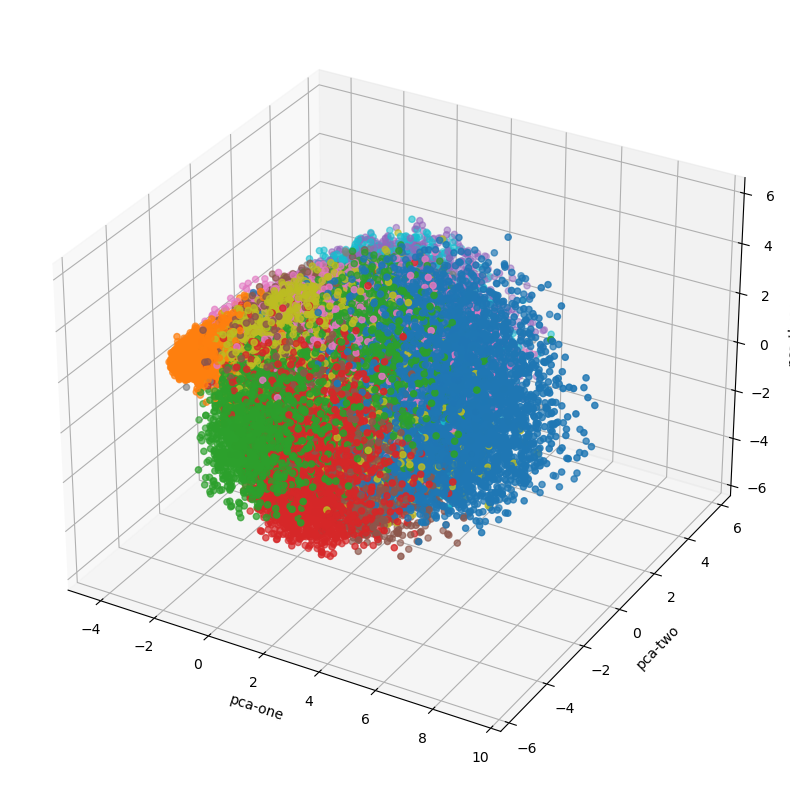

In [49]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(
    xs=df.loc[rndperm, :]["pca-one"],
    ys=df.loc[rndperm, :]["pca-two"],
    zs=df.loc[rndperm, :]["pca-three"],
    c=df.loc[rndperm, :]["y"].astype(float),
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()


we will first try to run the algorithm on the actual dimensions of the data (784) and see how it does. We’ll only use the first 10,000 samples to run the algorithm on to make sure we don’t burden our machine in terms of memory and power/time. I’ll also run the PCA again on the subset to compare.

In [50]:
N = 10000

df_subset = df.loc[rndperm[:N],:].copy()

data_subset = df_subset[feat_cols].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09819946 0.07123677 0.06113222]


In [51]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.018s...
[t-SNE] Computed neighbors for 10000 samples in 2.991s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.117974
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.847885
[t-SNE] KL divergence after 300 iterations: 2.770834
t-SNE done! Time elapsed:

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

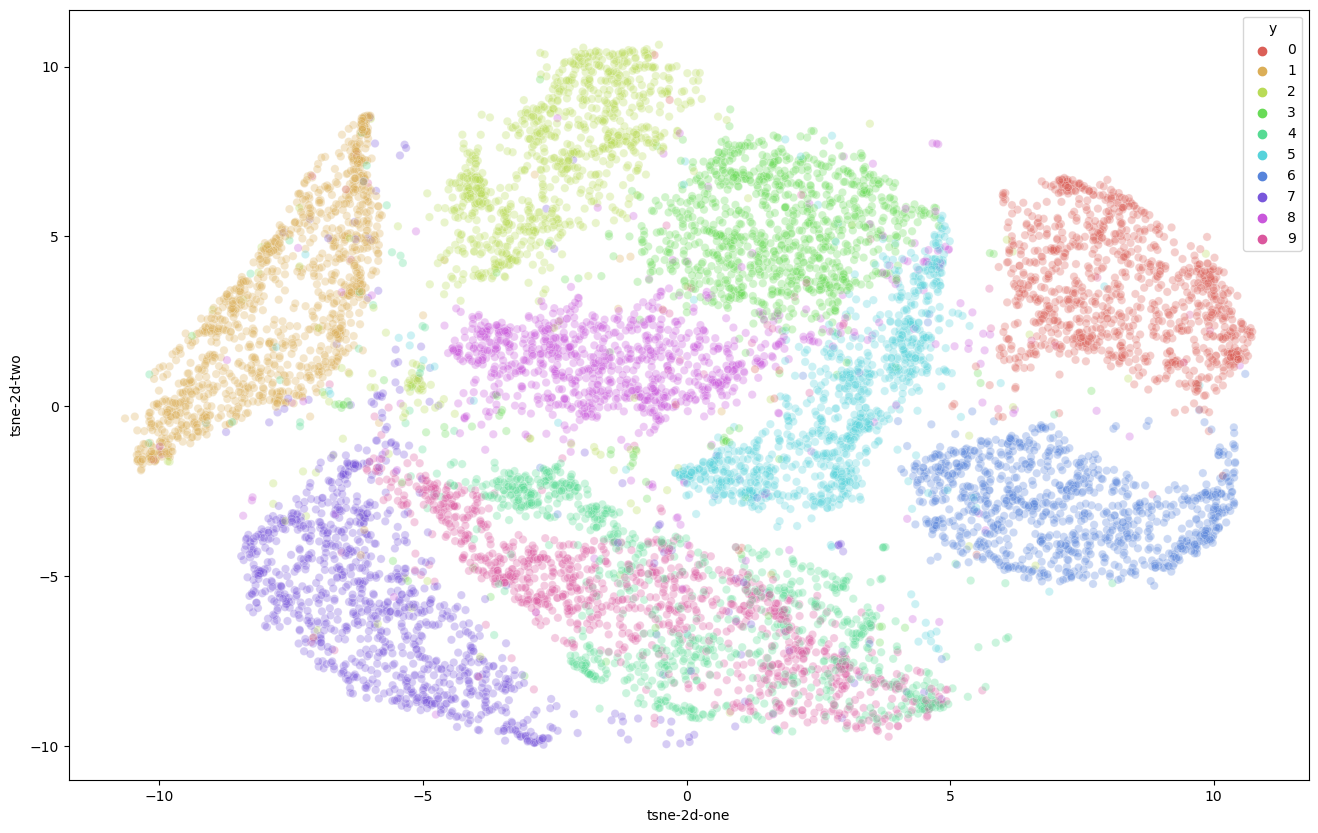

In [52]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

Just to compare PCA and t-SNE:

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

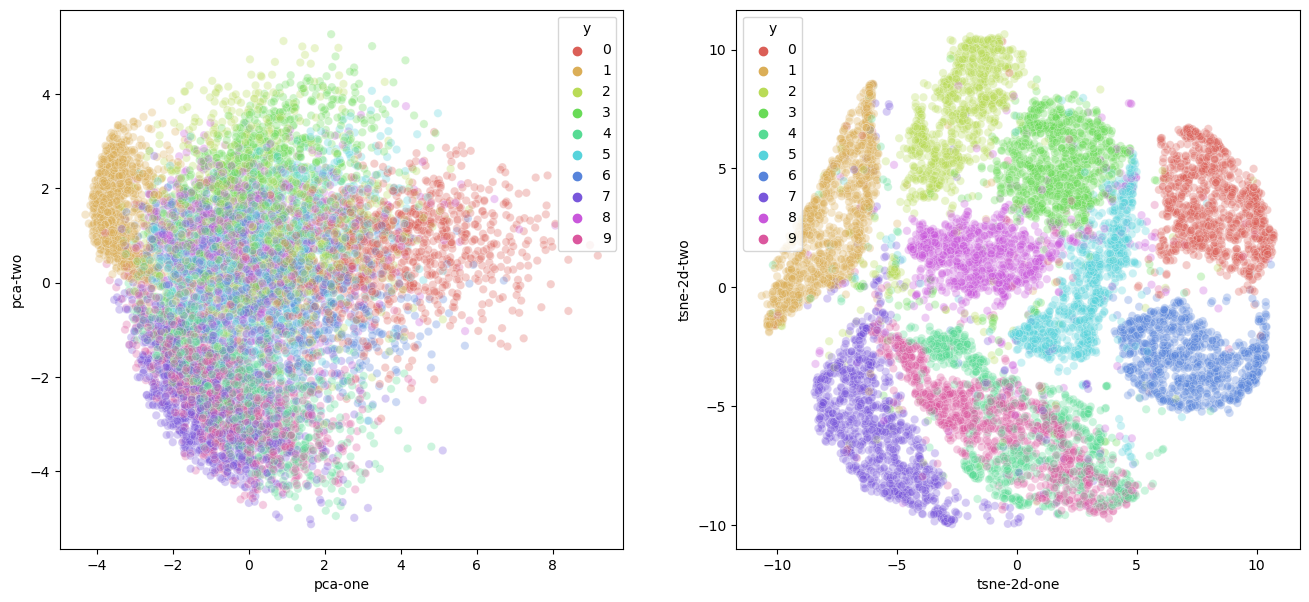

In [53]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

We can now take the recommendations to heart and reduce the number of dimensions before feeding the data into the t-SNE algorithm. We’ll use PCA again for this. We will first create a new data set containing the fifty dimensions generated by the PCA reduction algorithm. Then, we can use this dataset to perform the t-SNE.

see the recommendations from [video](url) on the [page](https://builtin.com/data-science/tsne-python)

In [55]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8261769578399729


In [56]:
time_start = time.time()

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 14.171885967254639 seconds


<Axes: xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

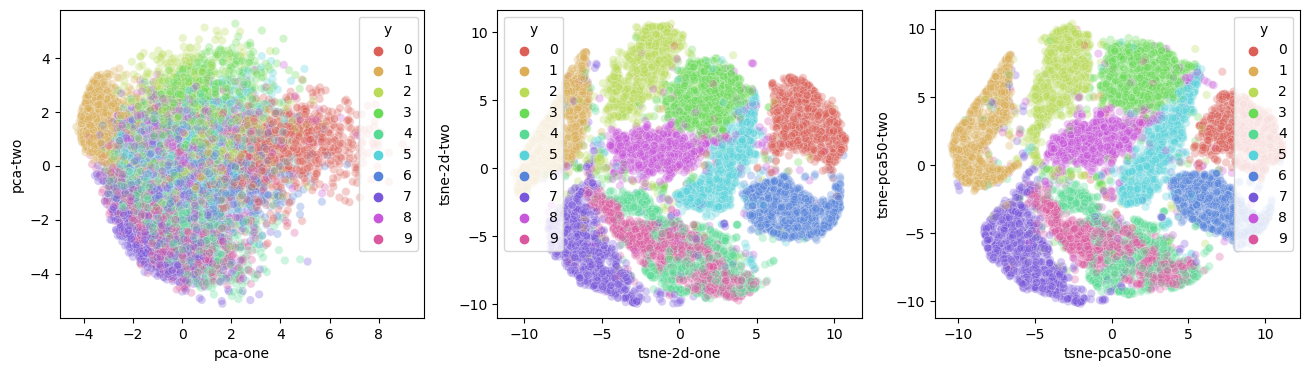

In [57]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)